Unique values in 'developed?' column: ['no' 'yes']
Value counts of 'developed?' column:
developed?
no     230
yes    230
Name: count, dtype: int64

Shape of developed countries dataframe: (230, 9)
Shape of non-developed countries dataframe: (230, 9)

Generating correlation matrix for developed countries...


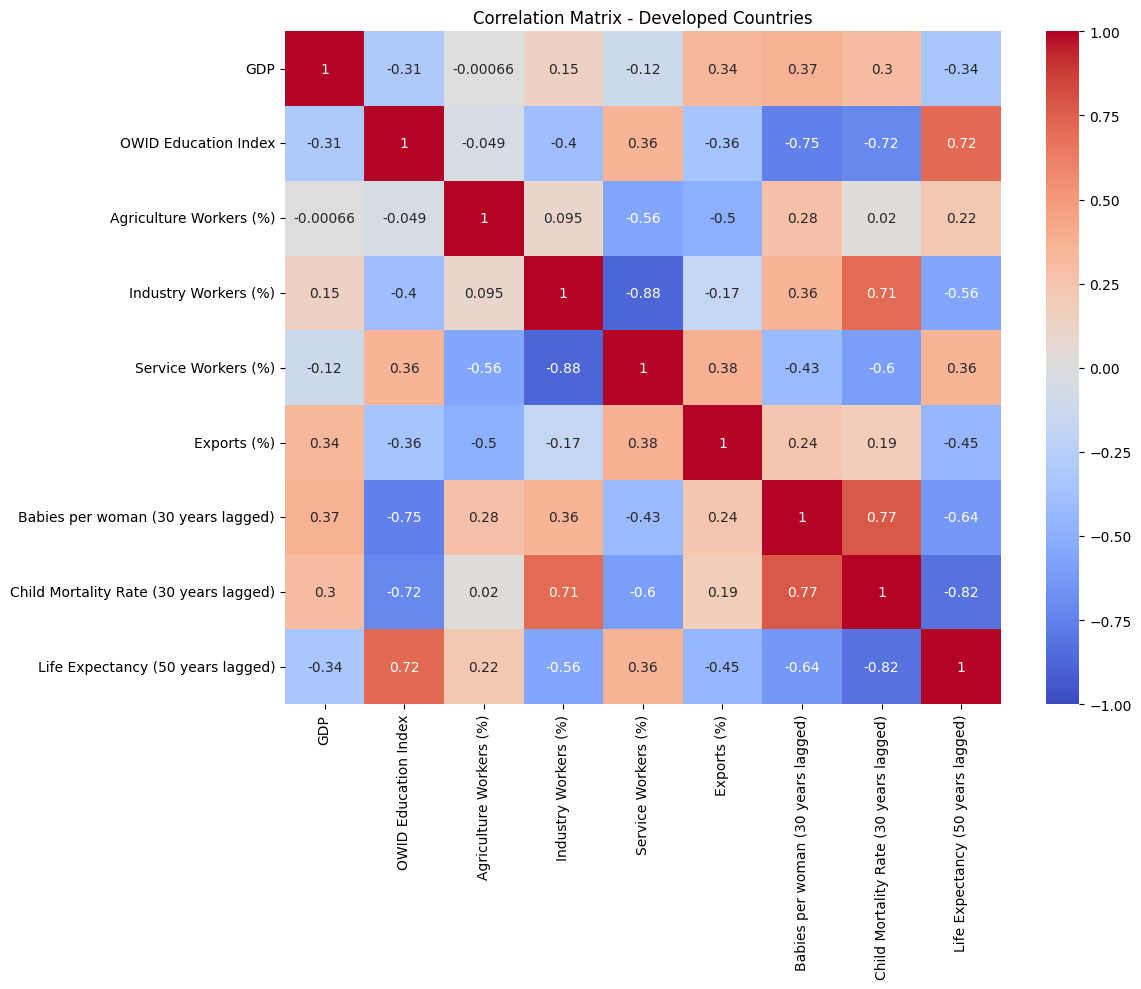


Generating correlation matrix for non-developed countries...


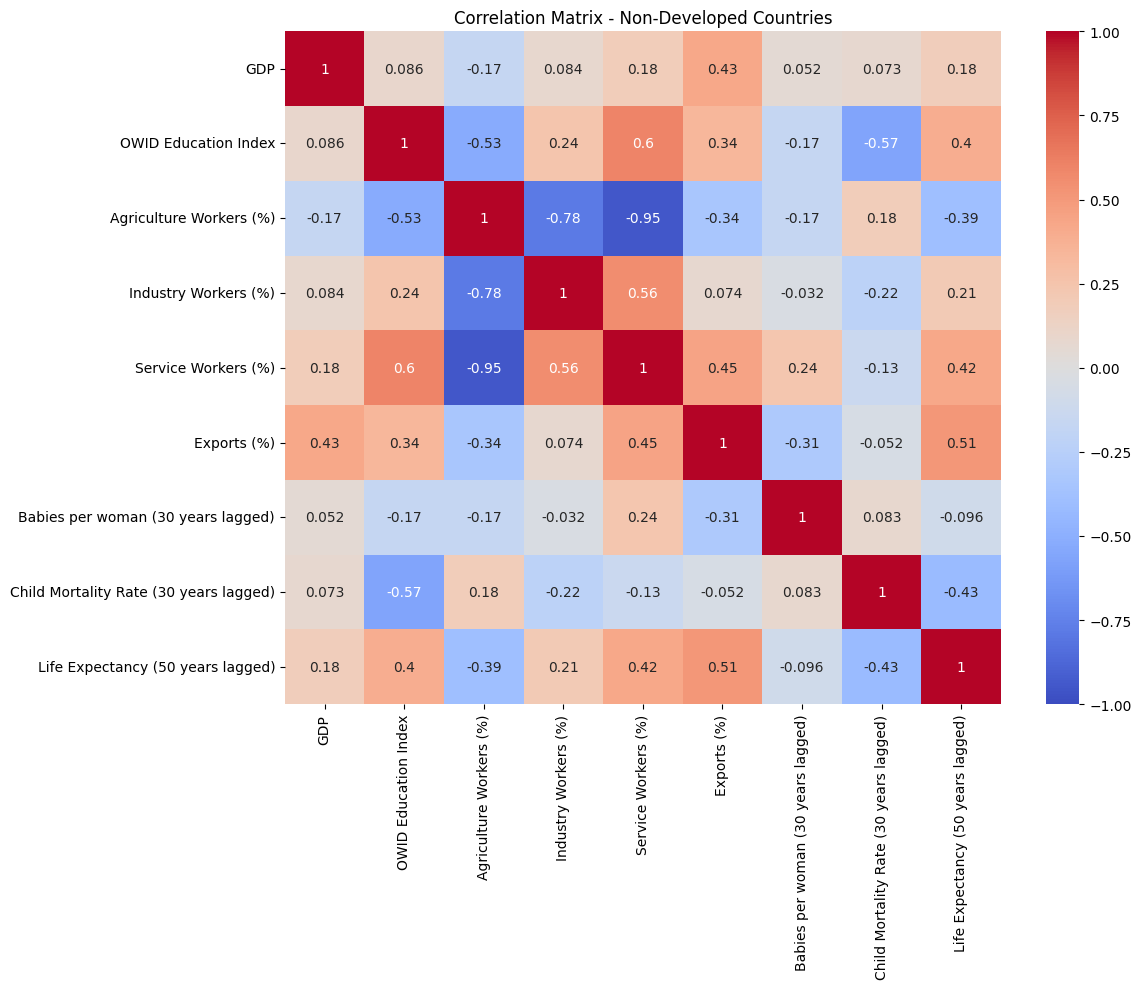


Correlation Matrix - Developed Countries:
                                             GDP  OWID Education Index  \
GDP                                     1.000000             -0.308082   
OWID Education Index                   -0.308082              1.000000   
Agriculture Workers (%)                -0.000661             -0.049227   
Industry Workers (%)                    0.146328             -0.403730   
Service Workers (%)                    -0.121461              0.358444   
Exports (%)                             0.339958             -0.357755   
Babies per woman (30 years lagged)      0.369484             -0.750226   
Child Mortality Rate (30 years lagged)  0.303997             -0.715803   
Life Expectancy (50 years lagged)      -0.338803              0.718570   

                                        Agriculture Workers (%)  \
GDP                                                   -0.000661   
OWID Education Index                                  -0.049227   
Agriculture Wor

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/pallavi/Desktop/DS Project 2/final_data.csv')
c = [
    'GDP', 'OWID Education Index',
    'Agriculture Workers (%)', 'Industry Workers (%)', 'Service Workers (%)',
    'Exports (%)', 'Babies per woman (30 years lagged)',
    'Child Mortality Rate (30 years lagged)', 'Life Expectancy (50 years lagged)'
]

# Function to replace minus signs with ones recognizeds by python
def clean(x):
    if isinstance(x, str):
        x = x.replace('−', '-').replace('–', '-').replace('—', '-')
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

for col in c:
    df[col] = df[col].apply(clean)
print("Unique values in 'developed?' column:", df['developed?'].unique())
print("Value counts of 'developed?' column:")
print(df['developed?'].value_counts())
df_developed = df[df['developed?'] == 'yes'][c]
df_non_developed = df[df['developed?'] == 'no'][c]
print("\nShape of developed countries dataframe:", df_developed.shape)
print("Shape of non-developed countries dataframe:", df_non_developed.shape)

# Function to create correlation matrix chart
def chart(data, title):
    if data.empty:
        print(f"No data available for {title}")
        return None
    matrix = data.corr()
    if matrix.isnull().all().all():
        print(f"Correlation matrix is all NaN for {title}")
        print("Sample of the data:")
        print(data.head())
        print("\nData types:")
        print(data.dtypes)
        print("\nMissing values:")
        print(data.isnull().sum())
        return None
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return matrix

print("\nGenerating correlation matrix for developed countries...")
corr_matrix_developed = chart(df_developed, 'Correlation Matrix - developed countries')

print("\nGenerating correlation matrix for non-developed countries...")
corr_matrix_non_developed = chart(df_non_developed, 'Correlation Matrix - developing countries')

if corr_matrix_developed is not None:
    print("\nCorrelation Matrix - Developed Countries:")
    print(corr_matrix_developed)

if corr_matrix_non_developed is not None:
    print("\nCorrelation Matrix - developing countries:")
    print(corr_matrix_non_developed)